# Review

In [1]:
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt
import os
import glob

In [3]:
img = cv2.imread('./fig/PD_MRI.jpeg')

if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('img',cv2.WINDOW_AUTOSIZE)
cv2.imshow('img',img)

cv2.waitKey()

cv2.destroyAllWindows()

In [11]:
img_lists = glob.glob('./fig/my_images/*.*')
img_files = os.listdir('./fig/my_images/')

img_paths = []
for i in img_files:
    path =  './fig/my_images/' + i
    img_paths.append(path)
    
cv2.namedWindow('scence', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scence', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)

idx=0
while True:
    img = cv2.imread(img_paths[idx])
    if img is None:
        print('image read failed')
        break
    cv2.imshow('scence', img)
    
    if cv2.waitKey(3000) ==27:
        break
        
    idx +=1
    
    if idx >= len(img_paths):
        idx =0
        
cv2.destroyAllWindows()   

In [13]:
src = cv2.imread('./fig/cow.png')
dst = cv2.imread('./fig/green.png')
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(src, 244, 255, cv2.THRESH_BINARY_INV)

h, w = mask.shape[:2]
r,c = 400, 100
crop = dst[r:r+h,c:c+h]

cv2.copyTo(src, mask, crop)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('mask', mask)

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
    
out = cv2.VideoWriter(fps,fourcc,(w,h))
while True:
    ret, frame = cap.read()
    if not ret:
        print('Video read failed')
        break
        
    cv2.imshow('frame', frame)
    out.write('cap.avi', frame)
    edge = cv2.Canny(frame, 50, 150)
    cv2.imshow('edge', edge)
    
    if cv2.waitKey(30)==27:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

In [16]:
## MOUSE EVENT
def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event==cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
    elif event==cv2.EVENT_MOUSEMOVE:
        if flags&cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img,(oldx,oldy),(x,y),(0,0,0), 5, cv2.LINE_AA)
            cv2.imshow('img',img)
            oldx, oldy = x, y

img = np.ones((500,700,3), np.uint8)*255

cv2.namedWindow('img')
cv2.setMouseCallback('img', call_mouse, img)


cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
def call_back(pos):
    img[:] = np.round(img1*(pos/255), 0)
    
    cv2.imshow('image',img)
    
img = cv2.imread('./fig/green.png', cv2.IMREAD_REDUCED_GRAYSCALE_2)

img1 = img.copy()

cv2.namedWindow('image')
cv2.createTrackbar('level','image',0,255, call_back)

cv2.imshow('image',img)

cv2.waitKey()
cv2.destroyAllWindows()

In [13]:
def call_trackbar(pos):
    alpha[:] = np.round(alpha1*(pos/255), 0)
    cv2.imshow('sunglass', alpha)

src = cv2.imread('./fig/imgbin_sunglasses_1.png',
                 cv2.IMREAD_UNCHANGED)

alpha = src[:,:,-1]
alpha1 = alpha.copy()

cv2.namedWindow('sunglass')
cv2.createTrackbar('level','sunglass',0,255,call_trackbar)
cv2.imshow('sunglass', alpha)

cv2.waitKey()
cv2.destroyAllWindows()

# 화소 처리 point processing

## 산술연사

In [18]:
src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('image read failed')
    sys.exit()

dst = np.clip(src + 100., 0. ,255.).astype(np.uint8)
dst1 = cv2.add(src,100)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.imshow('dst1',dst1)

cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
src = cv2.imread('./fig/lenna.bmp', 1)

dst = cv2.add(src, (100,100,100,0))
dst1 = np.clip(src+100.,0,255).astype(np.uint8)

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('dst1',dst1)

cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
src1 = cv2.imread('./fig/lenna256.bmp', 0)
src2 = np.zeros((256,256), np.uint8)
if src1 is None:
    print('image read failed')
    sys.exit()
    
cv2.circle(src2, (128,128), 100, 200, -1)
cv2.circle(src2, (128,128), 50, 50, -1)

dst1 = cv2.add(src1,src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)



cv2.imshow('src1',src1)
cv2.imshow('src2',src2)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)


cv2.waitKey()
cv2.destroyAllWindows()

(<AxesSubplot:title={'center':'dst4'}>,
 (-0.5, 255.5, 255.5, -0.5),
 Text(0.5, 1.0, 'dst4'))

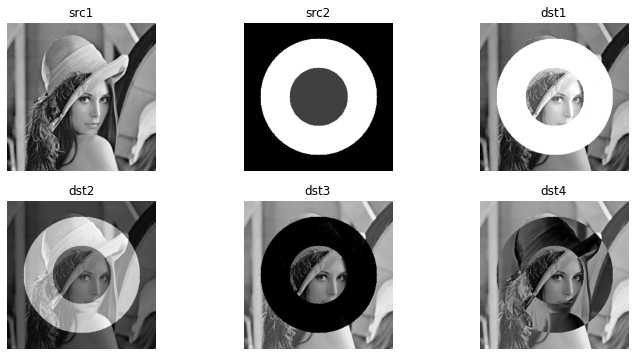

In [12]:
src1 = cv2.imread('./fig/lenna256.bmp', 0)
src2 = np.zeros((256,256), np.uint8)
if src1 is None:
    print('image read failed')
    sys.exit()
    
cv2.circle(src2, (128,128), 100, 200, -1)
cv2.circle(src2, (128,128), 50, 50, -1)

dst1 = cv2.add(src1,src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

plt.figure(figsize=(12,6))
plt.subplot(231), plt.imshow(src1, cmap='gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap='gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst1, cmap='gray'), plt.axis('off'), plt.title('dst1')
plt.subplot(234), plt.imshow(dst2, cmap='gray'), plt.axis('off'), plt.title('dst2')
plt.subplot(235), plt.imshow(dst3, cmap='gray'), plt.axis('off'), plt.title('dst3')
plt.subplot(236), plt.imshow(dst4, cmap='gray'), plt.axis('off'), plt.title('dst4')
plt.show()

In [34]:
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt
import os
import glob

src = cv2.imread('./fig/cat.bmp',cv2.IMREAD_GRAYSCALE)
hat = cv2.imread('./fig/imgbin_hat.png', cv2.IMREAD_UNCHANGED)
if src is None or hat is None:
    print('image read failed')
    sys.exit()
h,w = src.shape[:2]
hat = cv2.resize(hat, (350,h-100))
h,w = hat.shape[:2]
r,c = 0,170
crop = src[r:r+h,c:c+w]
hat_mask = hat[:,:,-1]

alpha = 0.01

while True:
    kw = cv2.waitKey(200)
    if kw==27:
        break
    src[r:r+h,c:c+w] = cv2.subtract(crop,(hat_mask*alpha).astype(np.uint8))
    cv2.imshow('src',src)
    alpha+=0.01
    if alpha>=1:
        alpha=1
    
cv2.waitKey()
cv2.destroyAllWindows()

In [39]:
src = cv2.imread('./fig/cat.bmp',cv2.IMREAD_COLOR)
img2 = cv2.imread('./fig/imgbin_hat.png', cv2.IMREAD_UNCHANGED)
if src is None or hat is None:
    print('image read failed')
    sys.exit()
img0 = src.copy()
    
h,w = src.shape[:2]
# print(h,w)
img2 = cv2.resize(img2, (350,h-100),
                 interpolation=cv2.INTER_AREA)
hat = img2[:,:,:-1]
mask = img2[:,:,-1]
h,w = mask.shape[:2]
r,c = 0,170
crop = src[r:r+h,c:c+w]

cv2.copyTo(hat, mask, crop)

for i in range(100):
    alpha = i*0.01
    dst = cv2.addWeighted(src,alpha,img0,1-alpha,0)
    cv2.imshow('dst', dst)
    
    if cv2.waitKey(100)==27:
        break
        
    if i==99:
        cv2.waitKey()
        
cv2.destroyAllWindows()

## bitwise operation

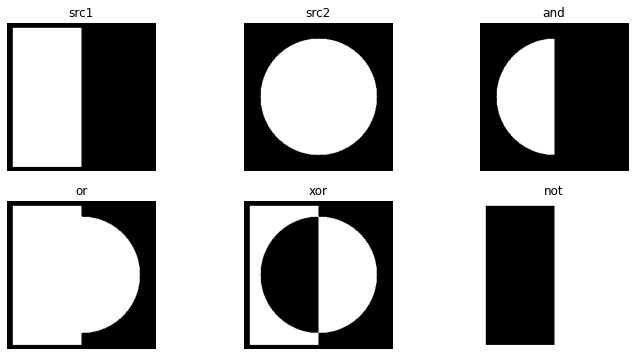

In [41]:
src1 = np.zeros((256,256), np.uint8)
cv2.rectangle(src1, (10,10),(127,248),255,-1)

src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2, (128,128), 100, 255, -1)

dst_bw_and = cv2.bitwise_and(src1, src2)
dst_bw_or = cv2.bitwise_or(src1, src2)
dst_bw_xor = cv2.bitwise_xor(src1, src2)
dst_bw_not = cv2.bitwise_not(src1)

plt.figure(figsize=(12,6))
plt.subplot(231), plt.imshow(src1, 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, 'gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst_bw_and, 'gray'), plt.axis('off'), plt.title('and')
plt.subplot(234), plt.imshow(dst_bw_or, 'gray'), plt.axis('off'), plt.title('or')
plt.subplot(235), plt.imshow(dst_bw_xor, 'gray'), plt.axis('off'), plt.title('xor')
plt.subplot(236), plt.imshow(dst_bw_not, 'gray'), plt.axis('off'), plt.title('not')

plt.show()

## split & merge

In [47]:
src = cv2.imread('./fig/flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
print(src.shape)

b,g,r = cv2.split(src)
h,s,v = cv2.split(src_hsv)
hh = src_hsv[:,:,0]
ss = src_hsv[:,:,1]
vv = src_hsv[:,:,2]

dst = cv2.merge((h,s,v))
dst1 = cv2.merge((hh,ss,vv))
dst = cv2.cvtColor(dst, cv2.COLOR_HSV2BGR)
dst1 = cv2.cvtColor(dst1, cv2.COLOR_HSV2BGR)

cv2.imshow('BGR', src)
# cv2.imshow('B', b)
# cv2.imshow('G', g)
# cv2.imshow('R', r)
# cv2.imshow('H', h)
# cv2.imshow('S', s)
# cv2.imshow('V', v)

cv2.imshow('dst', dst)
cv2.imshow('dst1', dst1)

cv2.waitKey()
cv2.destroyAllWindows()

(367, 550, 3)


# 히스토그램

<class 'numpy.ndarray'> (256, 1)


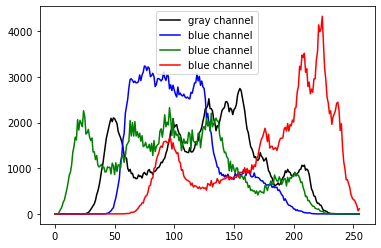

In [51]:
src = cv2.imread('./fig/lenna.bmp', 0)
src1 = cv2.imread('./fig/lenna.bmp', 1)

hist = cv2.calcHist([src], [0], None, [256], [0,256])
hist_b = cv2.calcHist([src1], [0], None, [256], [0,256])
hist_g = cv2.calcHist([src1], [1], None, [256], [0,256])
hist_r = cv2.calcHist([src1], [2], None, [256], [0,256])

print(type(hist), hist.shape)

# cv2.imshow('src', src)

plt.plot(hist,c='k',label='gray channel')
plt.plot(hist_b,c='b',label='blue channel')
plt.plot(hist_g,c='g',label='blue channel')
plt.plot(hist_r,c='r',label='blue channel')

plt.legend()
plt.show()

cv2.waitKey()

cv2.destroyAllWindows()

In [52]:
def getGrayHistImage(hist):
    imgHist = np.full((200, 256), 255, np.uint8)
    
    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x,200)
        pt2 = (x,200-int(hist[x,0]*200/histMax))
        cv2.line(imgHist, pt1, pt2, 0)
    
    return imgHist


src = cv2.imread('./fig/lenna.bmp', 0)

hist = cv2.calcHist([src], [0], None, [256], [0,256])
histImg = getGrayHistImage(hist)


cv2.imshow('src', src)
cv2.imshow('hist', histImg)

cv2.waitKey()
cv2.destroyAllWindows()

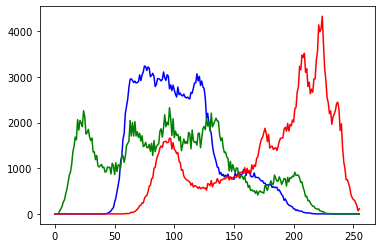

In [53]:
src = cv2.imread('./fig/lenna.bmp')

colors=['b','g','r']
bgr_values = cv2.split(src)

for (v,c) in zip(bgr_values, colors):
    hist = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist,c=c)
    
plt.show()